In [290]:
import pandas as pd
import numpy as np

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [294]:
cars_data = pd.read_csv('car data.csv')

In [296]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [298]:
cars_data.shape

(301, 9)

In [300]:
#preprocessing

In [302]:
#NULL CHECK

In [304]:
cars_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [306]:
#Duplicate Check
cars_data.duplicated().sum()

2

In [308]:
cars_data.drop_duplicates(inplace=True)

In [310]:
cars_data.shape


(299, 9)

In [312]:
cars_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [314]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [316]:
#Data Analysis

In [318]:
for col in cars_data.columns:
    print('Unique values of ' + col)
    print(cars_data[col].unique)
    print("======================\n")

Unique values of Car_Name
<bound method Series.unique of 0         ritz
1          sx4
2         ciaz
3      wagon r
4        swift
        ...   
296       city
297       brio
298       city
299       city
300       brio
Name: Car_Name, Length: 299, dtype: object>

Unique values of Year
<bound method Series.unique of 0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 299, dtype: int64>

Unique values of Selling_Price
<bound method Series.unique of 0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64>

Unique values of Present_Price
<bound method Series.unique of 0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 299, dtype: float6

In [320]:
def get_brand_name(car_name):
    car_name = car_name.split(' ')[0]
    return car_name.strip()

In [322]:
def clean_data(value):
    value = value.split(' ')[0]
    value = value.strip()
    if value == '':
        value = 0
    return float(value)

In [324]:
get_brand_name('sx4')

'sx4'

In [328]:
cars_data['Car_name'] = cars_data['Car_name'].apply(get_brand_name)

In [330]:
cars_data['Car_name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [342]:
cars_data['Car_name'].replace(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]
                          ,inplace=True)

In [344]:
cars_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [348]:
cars_data['Transmission'].replace(['Manual','Automatic'],[1,2],inplace=True)

In [350]:
cars_data['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [352]:
cars_data['Transmission'].replace(['Dealer', 'Individual'],[1,2],inplace=True)

In [354]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
 9   Car_name       299 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 25.7+ KB


In [356]:
cars_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [360]:
cars_data['Fuel_Type'].replace(['Petrol', 'Diesel', 'CNG'],[1,2,3],inplace=True)

In [362]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    int64  
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    int64  
 8   Owner          299 non-null    int64  
 9   Car_name       299 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 25.7+ KB


In [364]:
cars_data.reset_index(inplace=True)

In [366]:
cars_data

,index,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_name
0,0,1,2014,3.35,5.59,27000,1,Dealer,1,0,1
1,1,2,2013,4.75,9.54,43000,2,Dealer,1,0,2
2,2,3,2017,7.25,9.85,6900,1,Dealer,1,0,3
3,3,wagon r,2011,2.85,4.15,5200,1,Dealer,1,0,4
4,4,5,2014,4.60,6.87,42450,2,Dealer,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...
294,296,41,2016,9.50,11.60,33988,2,Dealer,1,0,41
295,297,42,2015,4.00,5.90,60000,1,Dealer,1,0,42
296,298,41,2009,3.35,11.00,87934,1,Dealer,1,0,41
297,299,41,2017,11.50,12.50,9000,2,Dealer,1,0,41


In [368]:
cars_data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [370]:
cars_data.drop(columns=['Car_Name'], inplace=True)  
cars_data

,index,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_name
0,0,2014,3.35,5.59,27000,1,Dealer,1,0,1
1,1,2013,4.75,9.54,43000,2,Dealer,1,0,2
2,2,2017,7.25,9.85,6900,1,Dealer,1,0,3
3,3,2011,2.85,4.15,5200,1,Dealer,1,0,4
4,4,2014,4.60,6.87,42450,2,Dealer,1,0,5
...,...,...,...,...,...,...,...,...,...,...
294,296,2016,9.50,11.60,33988,2,Dealer,1,0,41
295,297,2015,4.00,5.90,60000,1,Dealer,1,0,42
296,298,2009,3.35,11.00,87934,1,Dealer,1,0,41
297,299,2017,11.50,12.50,9000,2,Dealer,1,0,41


In [372]:
input_data = cars_data.drop(columns=['Selling_Price'])
output_data = cars_data['Selling_Price']

In [374]:
x_train, x_shape, y_train, y_shape = train_test_split(input_data, output_data, test_size=0.2)

In [376]:
#model Creation

In [378]:
model = LinearRegression()

In [380]:
#Train Model

In [406]:
print(input_data.dtypes)

index              int64
Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type          int64
Selling_type       int64
Transmission       int64
Owner              int64
Car_name           int64
dtype: object


In [408]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
input_data['Selling_type'] = le.fit_transform(input_data['Selling_type'])

In [423]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# Train the Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [425]:
import pandas as pd

prediction_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": predict.flatten()
})

print(prediction_df.head(10))


   Actual Price  Predicted Price
0          8.99         7.894146
1          8.35         7.824209
2          0.45         1.296754
3          7.45         6.834996
4          5.25        11.086288
5          5.25         4.757707
6          5.85         8.566137
7          1.15         1.662347
8          9.25         8.454890
9          0.38        -0.961969


In [463]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
r2 = r2_score(y_test, predict)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Mean Absolute Error: 1.4540024690742965
Mean Squared Error: 6.2467784013710865
Root Mean Squared Error: 2.4993555972232295
R² Score: 0.7576256219523119


In [433]:
predict = model.predict(x_test)
predict

array([ 7.89414573,  7.82420935,  1.2967535 ,  6.83499587, 11.08628846,
        4.75770713,  8.56613684,  1.66234692,  8.45488952, -0.96196936,
       10.28818468, -0.66662854,  0.79250456,  1.47755115,  4.33613604,
        4.64578673,  1.46331142,  1.68024339, 21.48819809,  0.70389619,
        0.90483546,  1.92694289,  6.09770537,  0.33822102,  5.96853018,
        8.16841612,  8.92223695,  1.20438435,  4.54222906,  4.9073547 ,
        6.46488237,  5.50782944,  5.8874132 ,  2.62935744,  3.34760248,
        6.51340988,  1.25155536, -4.25094107,  1.09558433, 10.42497977,
        6.97904806,  8.8379164 ,  1.48727991,  3.74722849,  0.68628608,
       -1.8677148 ,  8.00300258,  4.62026238,  5.83934814, -0.54455182,
        0.36625287,  0.29618566,  9.69649332,  9.51012042,  7.66548774,
        5.83856672,  4.11465706,  3.43099237,  9.29578971,  8.8688388 ])

In [437]:
x_train.head(1)

,index,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_name
6,6,2015,8.12,18796,1,0,1,0,3


In [453]:
input_data_model = pd.DataFrame(
    [[6,2022,8.12,18796,1,0,1,0,3]],
    columns=['index','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner','Car_name'])


In [455]:
input_data_model

,index,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_name
0,6,2022,8.12,18796,1,0,1,0,3


In [457]:
model.predict(input_data_model)

array([7.90659254])

In [459]:
import pickle as pk

In [461]:
pk.dump(model,open('model.pkl','wb'))

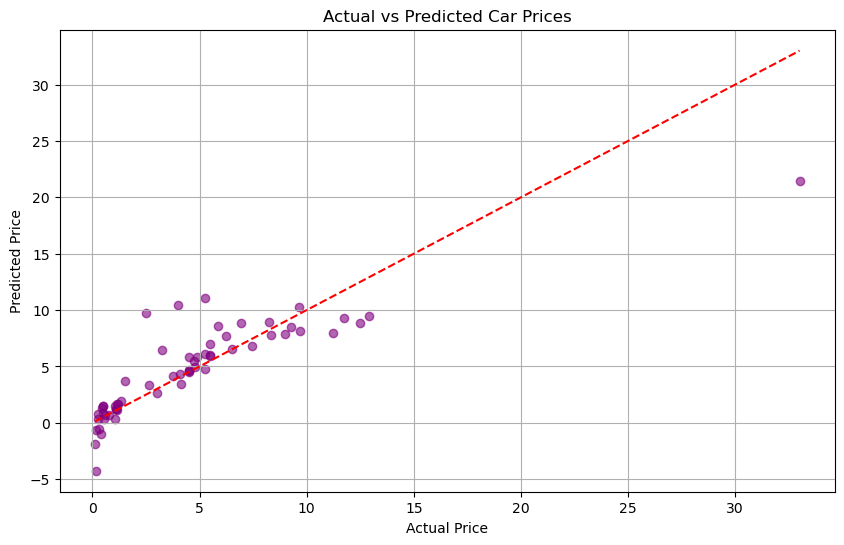

In [465]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, predict, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()
